In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

In [2]:
from tensorflow.keras.datasets import mnist # библиотека базы выборок MNIST (цифры)

# база данных образцов рукописного написания цифр

In [3]:
# Загружаем обучающую и тестовую выборку

(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [4]:
print(len(x_train)) # Изображение обучающей выборки
print(len(y_train)) # Вектор соответствующих значений цифр для обучающей выборки

print(len(x_test))  # Изображение тестовой выборки
print(len(y_test))  # Вектор соответствующих значений цифр для тестовой выборки
x_train.shape

60000
60000
10000
10000


(60000, 28, 28)

In [5]:
# Делаем стандартизацию данных

x_train = x_train / 255 # Будут совершать числа от 0 до 1
x_test = x_test /255


# Преобразуем int в vector. 5 == [0,0,0,0,0,1,0,0,0,0]. 
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)
y_train[:100]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [6]:
limit = 5000 #batch
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

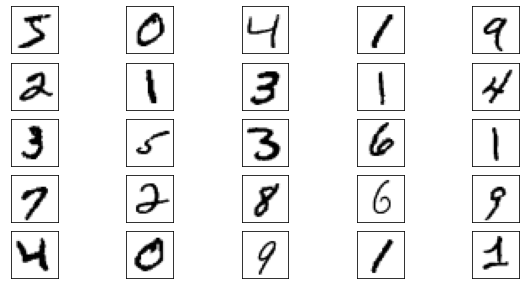

In [7]:
# смотрим первые 25 изображений

plt.figure(figsize =(10,5))

for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap = plt.cm.binary)
plt.show()

In [8]:
# Для распознавания изображений используются свёрточные сети
# но мы воспользуемся обычной полносвязной

# 28 * 28 = 784 входа (изображение имеет размер 28 на 28 пикселей)
# 150 нейронов скрытого слоя (ReLu)
# 10 нейронов выходного слоя (softmax)
# 1 скрытый слой

hight = x_train[0].shape[0]
weight = x_train[0].shape[1]
im_size = hight * weight

In [9]:
# Необходимо преобразовать изобрежения (28*28) в вектор (длиной 784) (Flatten)
# Следом нужно связать каждое входное значение с каждым нейроном

model = keras.Sequential([
    Flatten(input_shape=(hight,weight,1)), # Преобразование 28*28 -> vector 784
    Dense(5000,activation='relu'),  # скрытый слой 150 neironov
    # Dropout(0.8),
    # BatchNormalization(),
    Dense(10,activation='softmax')  # выходной слой
])

print(model.summary())

# Param у Dense_2 считается как количество входов +1 (784 +1 = 785), умноженное
# на количество нейронов (150). 785*150=117750

# Param у Dense_3 - количество нейронов +1 * 10. (150+1)*10 = 1510

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5000)              3925000   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50010     
Total params: 3,975,010
Trainable params: 3,975,010
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']  # минимизация процента ошибок

)

In [ ]:
# Запускаем обучение, разделенное на 80:20

his = model.fit(x_train,y_train_cat,batch_size=32,epochs=4,validation_split=0.2)
#epochs = 5

Epoch 1/4
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1902 - accuracy: 0.9414 - val_loss: 0.1178 - val_accuracy: 0.9647
Epoch 2/4
 873/1500 [================>.............] - ETA: 9s - loss: 0.0814 - accuracy: 0.9735

In [ ]:
# Проверяем на тестовой выборке

model.evaluate(x_test,y_test_cat) # Точность 97% 

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [ ]:
# Проверяем ещё раз

n = 4
x = np.expand_dims(x_test[n],axis=0) # создаем трехмерный тензор
res = model.predict(x) # ожидает трехмерный тензор
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Распознавание всей тестовой выборки

pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(f'Предсказано:            {pred[:20]}')
print(f'Что должно было выдать: {y_test[:20]}')

plt.imshow(x_test[8], cmap=plt.cm.binary) 
plt.show()


In [ ]:
# Узнаем, что тут ещё за хрень водится

mask = (pred==y_test)
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)

In [ ]:
for i in range(10):
    print(f"Значение сети: {p_false[i]}")
    plt.subplot(5,5,i+1)
    plt.imshow(x_false[i], cmap = plt.cm.binary)
    plt.show()